In [250]:
import pandas as pd
import numpy as np
import warnings

In [252]:
from sklearn.model_selection import train_test_split # This function is used to split the dataset into training and testing subsets.
from sklearn.preprocessing import MinMaxScaler # It scales all the features in the dataset to a given range, usually between 0 and 1.
from sklearn.linear_model import LinearRegression # This imports a linear regression model.
from sklearn.ensemble import RandomForestRegressor # Random Forest is an ensemble method that combines multiple decision trees to improve accuracy and control overfitting.
from xgboost import XGBRegressor# XGBoost is a high-performance, optimized implementation of gradient boosting that often yields top results in structured data problems.
from sklearn.metrics import r2_score, mean_absolute_percentage_error # These are metrics to evaluate how well your regression model is performing.
import matplotlib.pyplot as plt # send for creating visual plots and graphs like line charts, scatter plots, etc.
import seaborn as sns # Seaborn is a higher-level visualization library built on top of matplotlib.

In [254]:
# ignore warning for cleaner output
warnings.simplefilter(action='ignore',category=FutureWarning)

# data loading
print("--- Step 1: Loading and Preprocessing Data---")

# load the dataset :- 
try:
    df = pd.read_csv("worldometer_data (1).csv")
except FileNotFoundError:
    print("Error: The file 'worldometer_data.csv' was not found")
    exit()

--- Step 1: Loading and Preprocessing Data---


In [255]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [256]:
# display the information and descriptive stats
print("Initial dataframe Information :- ")
df.info()

Initial dataframe Information :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64

In [257]:
print("\n Descriptive Statistics :- ") # It displays descriptive statistics of the dataset df
print(df.describe().T) # .T -> transpose for easier reading, .describe() -> summary stats of each numerical column


 Descriptive Statistics :- 
                  count          mean           std     min        25%  \
Population        208.0  3.041549e+07  1.047661e+08  801.00  966314.00   
TotalCases        209.0  9.171850e+04  4.325867e+05   10.00     712.00   
NewCases            4.0  1.980500e+03  3.129611e+03   20.00      27.50   
TotalDeaths       188.0  3.792590e+03  1.548718e+04    1.00      22.00   
NewDeaths           3.0  3.000000e+02  4.511995e+02    1.00      40.50   
TotalRecovered    205.0  5.887898e+04  2.566984e+05    7.00     334.00   
NewRecovered        3.0  1.706000e+03  2.154780e+03   42.00     489.00   
ActiveCases       205.0  2.766433e+04  1.746327e+05    0.00      86.00   
Serious,Critical  122.0  5.343934e+02  2.047519e+03    1.00       3.25   
Tot Cases/1M pop  208.0  3.196024e+03  5.191986e+03    3.00     282.00   
Deaths/1M pop     187.0  9.868118e+01  1.749569e+02    0.08       6.00   
TotalTests        191.0  1.402405e+06  5.553367e+06   61.00   25752.00   
Tests/1M 

In [258]:
# Handle all the missing values and replace with median
numeric_cols = df.select_dtypes(include=np.number).columns # It uses select_dtypes(include=np.number) to filter only numeric columns.
# because in dataset some has nan values
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median()) # calculates the median value ignoring the missing entries.

In [260]:
# Feature Engineering and transgformation
print("\n--- Step 2 Feature Engineering and Transformation")


--- Step 2 Feature Engineering and Transformation


In [261]:
print(df.columns.tolist())


['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']


In [263]:
df['Test Positive Rate'] = np.where(
    df['TotalTests'] > 0,
    df['TotalCases'] / df['TotalTests'],  # use correct column name
    0
)

# Replace infinities with 0
df['Test Positive Rate'] = df['Test Positive Rate'].replace([np.inf, -np.inf], 0)

# Fill NaN values with 0
df['Test Positive Rate'] = df['Test Positive Rate'].fillna(0)


In [265]:
# Apply log transformation to reduce skewness and improve model performance
df['Total_case_log'] = np.log1p(df['TotalCases'])
 # np.log1p(x) computes log(1 + x) accurately even when x is very small.
df['Population_Log'] = np.log1p(df['Population']) # This is useful because populations range from a few hundred to billions — applying the log makes analysis easier and more stable.
df['Testing_Log'] = np.log1p(df['TotalTests']) # Testing numbers can also be extremely large, so this transformation helps reduce variability and outlier effects.

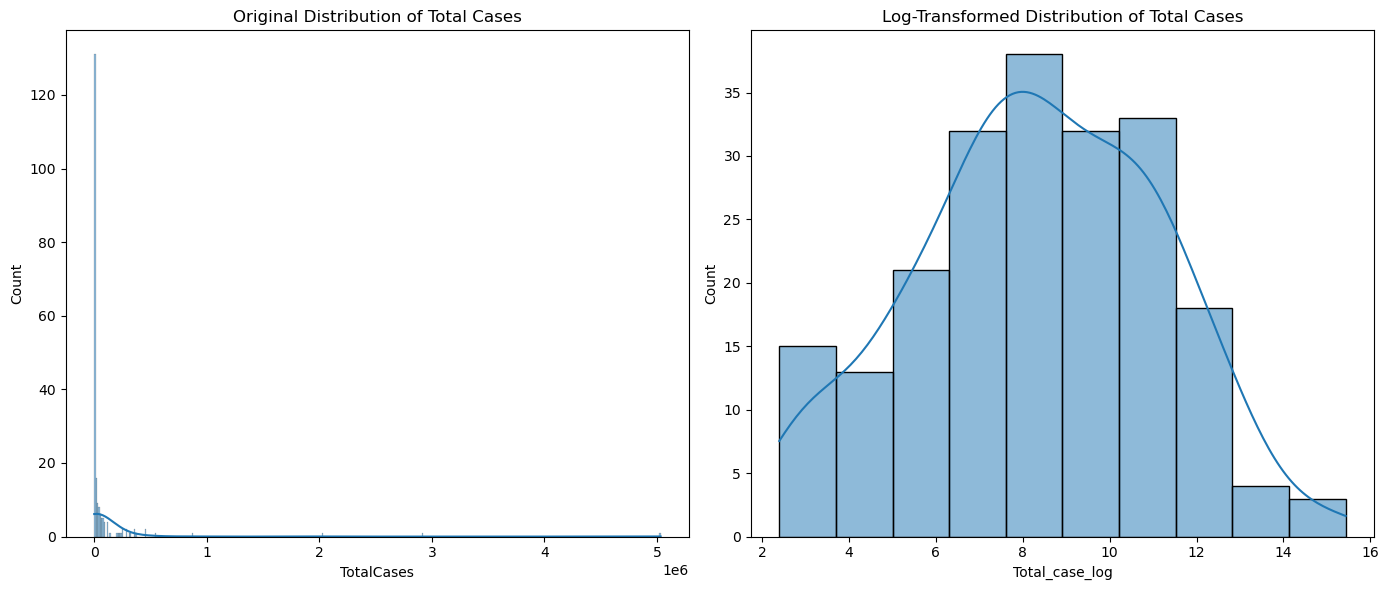

In [268]:
import numpy as np
import matplotlib.pyplot as plt


# Apply log transformation to reduce skewness
df['Total_case_log'] = np.log1p(df['TotalCases'])    
df['Population_Log'] = np.log1p(df['Population'])
df['Testing_Log'] = np.log1p(df['TotalTests'])

# Plot the distribution of the original and transformed target variable to demonstrate the effect
plt.figure(figsize=(14, 6)) # Creates a new figure for plotting with a width of 14 units and height of 6 units.

# Plot original distribution
plt.subplot(1, 2, 1) # figure will be divided into 1 row and 2 columns of subplots.
sns.histplot(df['TotalCases'], kde=True)
plt.title('Original Distribution of Total Cases') # his plots the original data from the TotalCases column.

# Plot log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Total_case_log'], kde=True)  # Use correct column name here
plt.title('Log-Transformed Distribution of Total Cases')

plt.tight_layout()
plt.show()


In [269]:
# ---3. Feature and Target Selection -- 
print("\n--- Step3: Feature and Target Selection---")



--- Step3: Feature and Target Selection---


In [270]:
# Define Target and feature sets :-
target = 'Total_case_log'
# Drop the columna and non predictive features
features_to_drop = ['Country/Region', 'NewCases', 'NewDeaths', 'NewRecovered',
                    'WHO Region', 'Continent', 'TotalCases', 'TotalTests',
                    'Population', 'TotalDeaths'] #  list of columns that should be excluded from the feature set.
features=df.drop(columns = features_to_drop, errors = 'ignore').columns
x = df[features]
y = df[target]

In [271]:
from sklearn.preprocessing import MinMaxScaler

# Select feature columns (example)
feature_cols = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'TotalTests']
X = df[feature_cols]  # X is now your feature matrix

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)


In [276]:
# split data into traininng and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [277]:
# --- 4. Model Training and Evaluation ---
print("\n--- Step 4: Training and Evaluating Models ---")



--- Step 4: Training and Evaluating Models ---


In [278]:
def train_and_evaluate(model, model_name):
    """
    Trains a regression model and evaluates its performance with key metrics.
    """
    print(f"\n--- Training {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # You can add evaluation metrics here, for example:
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred) # Calculates Mean Squared Error between the actual test targets (y_test) and the predicted values (y_pred).
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.4f}, R2: {r2:.4f}")
    

    

In [279]:
# Initialize and train models
linear_reg = LinearRegression() # This creates an instance of the Linear Regression model from scikit-learn.
train_and_evaluate(linear_reg, "Linear Regression (Baseline)") # Calls the train_and_evaluate function you defined earlier.



--- Training Linear Regression (Baseline) ---
MSE: 5.9201, R2: 0.2400


In [280]:
from sklearn.ensemble import RandomForestRegressor

# Create model
random_forest_reg = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
# Random Forest is an ensemble learning algorithm that builds multiple decision trees and averages their predictions for regression tasks.
# Train and evaluate
train_and_evaluate(random_forest_reg, "Random Forest Regressor") # This will print the MSE and R² for the Random Forest.
# This calls the train_and_evaluate
# The Random Forest learns the relationship between X_train (features) and y_train (target)


--- Training Random Forest Regressor ---
MSE: 0.0037, R2: 0.9995


In [281]:
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate(model, name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    preds = model.predict(X_test)
    
    # Evaluate performance
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"{name} RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    # RETURN both trained model and predictions
    return model, preds


In [282]:
# --- 5. Key Insights: Feature Importance ---
print("\n--- Step 5: Key Insights from Feature Importance ---")



--- Step 5: Key Insights from Feature Importance ---


In [283]:
from sklearn.ensemble import RandomForestRegressor

# Initialize
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Train using the same function (if defined)
rf_model, rf_preds = train_and_evaluate(rf_model, "Random Forest Regressor")


Random Forest Regressor RMSE: 0.0609, R²: 0.9995


In [333]:
features = [f"feature_{i}" for i in range(X_train.shape[1])]


In [335]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [337]:
import pandas as pd

feature_importances_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)


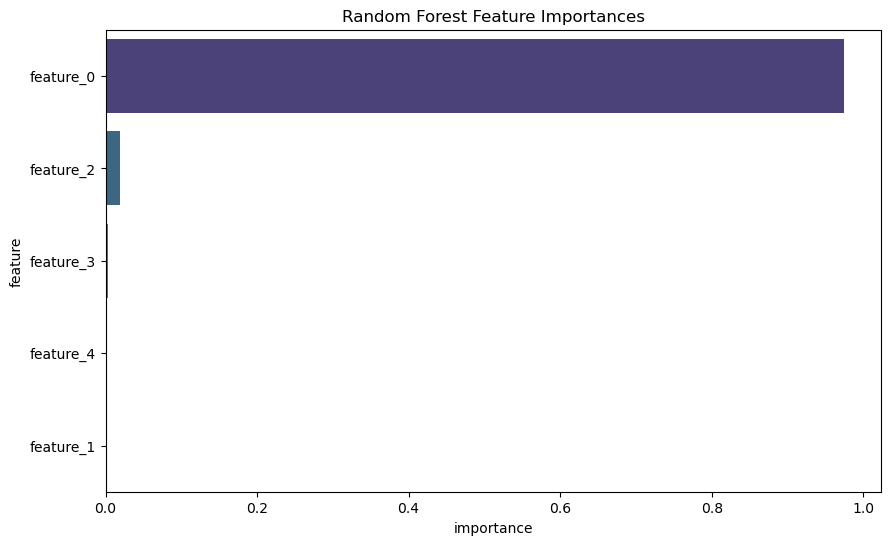

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances_rf, palette='viridis')
plt.title("Random Forest Feature Importances")
plt.show()


In [351]:
print("Top 5 Features by Importance (Random Forest):")
print(feature_importances_rf.head().to_string(index=False))


Top 5 Features by Importance (Random Forest):
  feature  importance
feature_0    0.974047
feature_2    0.018875
feature_3    0.003843
feature_4    0.001711
feature_1    0.001524


In [355]:
xgboost_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model, xgb_preds = train_and_evaluate(xgboost_reg, "XGBoost Regressor")


XGBoost Regressor RMSE: 0.0705, R²: 0.9994


In [359]:
# Extract and display feature importances for tree-based models
feature_importances_rf = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_}).sort_values(by='importance', ascending=False)
feature_importances_xgb = pd.DataFrame({'feature': features, 'importance': xgb_model.feature_importances_}).sort_values(by='importance', ascending=False)



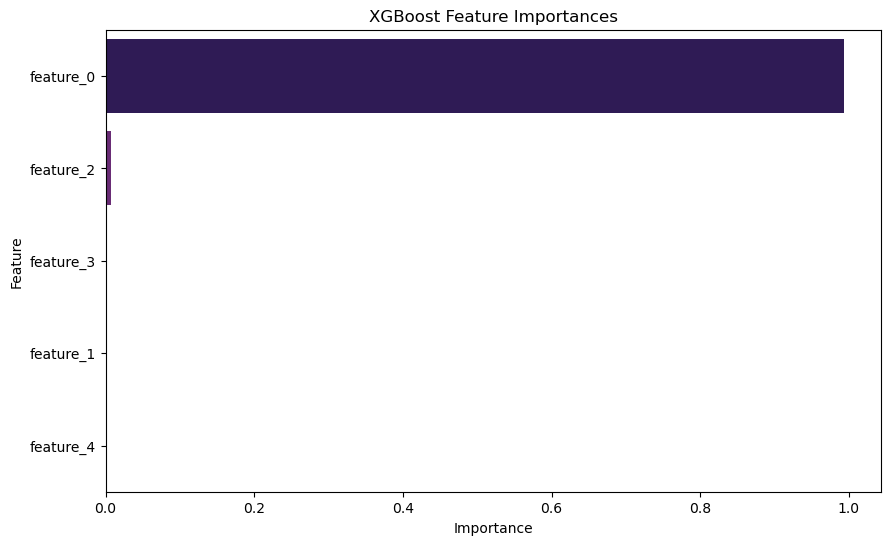

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances_xgb, palette='magma')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [361]:
print("\nTop 5 Features by Importance (XGBoost):")
print(feature_importances_xgb.head().to_string(index=False))




Top 5 Features by Importance (XGBoost):
  feature  importance
feature_0    0.992859
feature_2    0.007038
feature_3    0.000067
feature_1    0.000023
feature_4    0.000014


In [365]:
# --- Conceptual Time-Series Models (for context only) ---
# Note: LSTM and ARIMA models require time-series data, which is not available in the provided
# single-snapshot dataset. This section is a conceptual placeholder to show understanding.
print("\n--- Conceptual Time-Series Modeling (Requires a different dataset) ---")
print("To model sequential data with LSTM or ARIMA, the dataset would need to include daily or weekly records per country.")


--- Conceptual Time-Series Modeling (Requires a different dataset) ---
To model sequential data with LSTM or ARIMA, the dataset would need to include daily or weekly records per country.


In [367]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')  # or rf_model.pkl


['xgb_model.pkl']

In [379]:
import pandas as pd

# Replace with real values for your features
new_data = pd.DataFrame([
    [10, 5, 3],   # First row
    [7, 2, 6]     # Second row
], columns=['feature_0', 'feature_1', 'feature_2'])



In [387]:
print(loaded_model.n_features_in_)


5


In [389]:
import pandas as pd

# Example: 5 features
new_data = pd.DataFrame([
    [10, 5, 3, 7, 2],   # First row
    [7, 2, 6, 1, 4]     # Second row
], columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4'])


In [392]:
predictions = loaded_model.predict(new_data)
print(predictions)


[15.398473 15.398473]


In [398]:
#Time Series ''

In [394]:
import pandas as pd
import numpy as np

# Example: 3 countries, original snapshot data
countries = ['India', 'USA', 'Brazil']
days = pd.date_range(start='2025-09-01', end='2025-09-07')  # 7 days

# Original features per country (snapshot)
snapshot_data = {
    'country': countries,
    'gdp': [3.0, 21.0, 1.5],             # in trillion USD
    'hospital_beds': [1.5, 2.8, 2.0]     # per 1000 people
}

# Create a list to store rows
time_series_data = []

for country, gdp, beds in zip(snapshot_data['country'], snapshot_data['gdp'], snapshot_data['hospital_beds']):
    cases = 100  # starting cases
    for day in days:
        # Simulate daily cases (just for example, increasing trend)
        cases += np.random.randint(50, 200)
        time_series_data.append([country, day, cases, gdp, beds])

# Create DataFrame
ts_df = pd.DataFrame(time_series_data, columns=['country', 'date', 'total_cases', 'gdp', 'hospital_beds'])
print(ts_df.head(10))


  country       date  total_cases   gdp  hospital_beds
0   India 2025-09-01          267   3.0            1.5
1   India 2025-09-02          368   3.0            1.5
2   India 2025-09-03          518   3.0            1.5
3   India 2025-09-04          705   3.0            1.5
4   India 2025-09-05          821   3.0            1.5
5   India 2025-09-06          992   3.0            1.5
6   India 2025-09-07         1124   3.0            1.5
7     USA 2025-09-01          183  21.0            2.8
8     USA 2025-09-02          341  21.0            2.8
9     USA 2025-09-03          482  21.0            2.8


In [402]:
#For ARIMA: You can take one country’s series:
india_cases = ts_df[ts_df['country'] == 'India'].set_index('date')['total_cases']


In [404]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


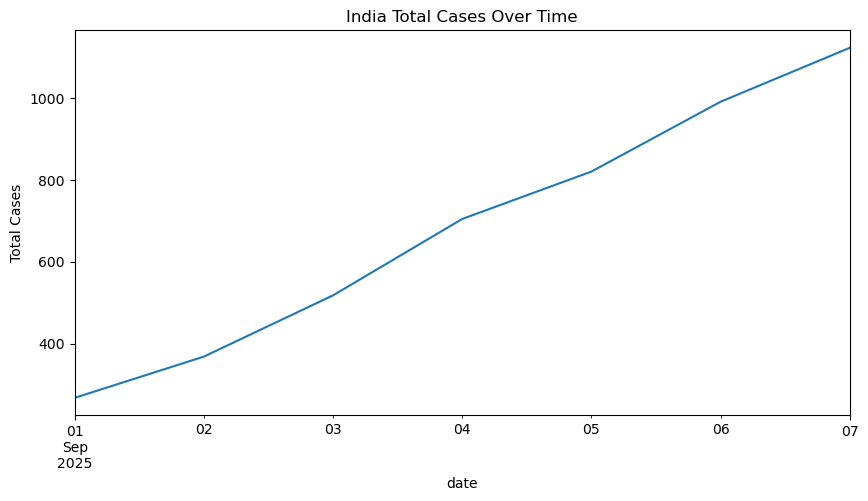

In [406]:
india_cases.plot(figsize=(10,5), title='India Total Cases Over Time')
plt.ylabel('Total Cases')
plt.show()


In [409]:
# ARIMA(p,d,q) parameters:
# p = autoregressive terms
# d = differences to make series stationary
# q = moving average terms

model = ARIMA(india_cases, order=(1,1,1))  # simple example
arima_result = model.fit()


C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [411]:
# Forecast next 3 days
forecast = arima_result.forecast(steps=3)
print(forecast)


2025-09-08    1265.623921
2025-09-09    1407.247388
2025-09-10    1548.870401
Freq: D, Name: predicted_mean, dtype: float64


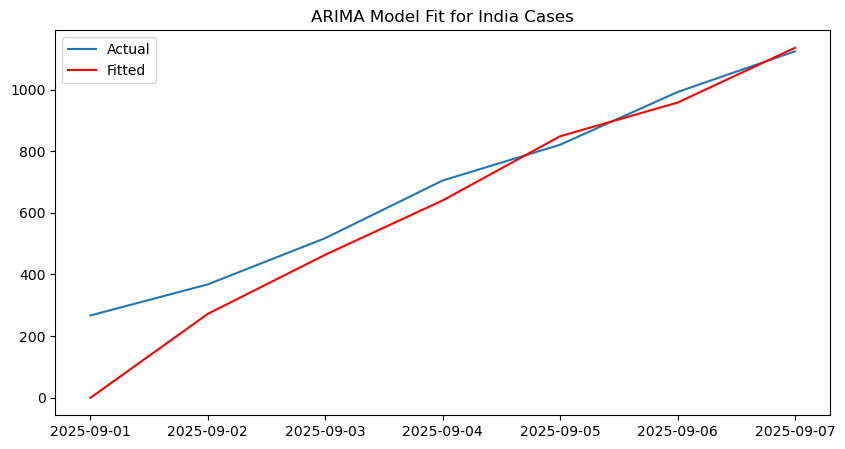

In [413]:
plt.figure(figsize=(10,5))
plt.plot(india_cases, label='Actual')
plt.plot(arima_result.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA Model Fit for India Cases')
plt.legend()
plt.show()


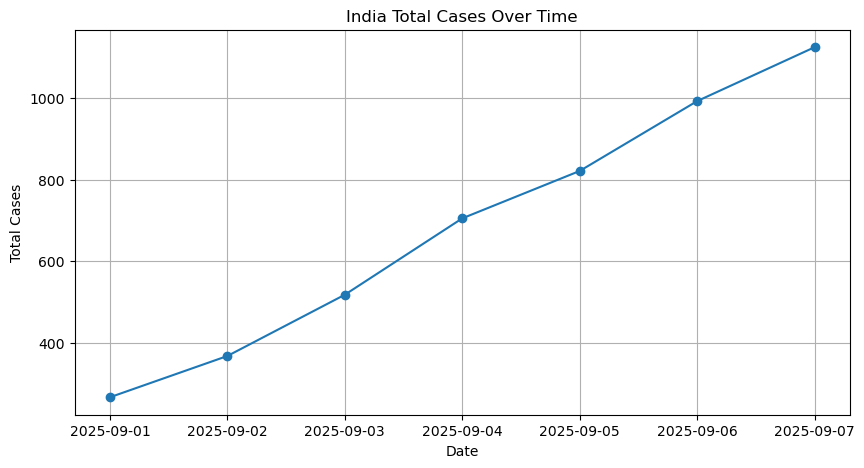

C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rajku\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forecast for next 5 days:
2025-09-08    1265.623921
2025-09-09    1407.247388
2025-09-10    1548.870401
2025-09-11    1690.492960
2025-09-12    1832.115065
Freq: D, Name: predicted_mean, dtype: float64


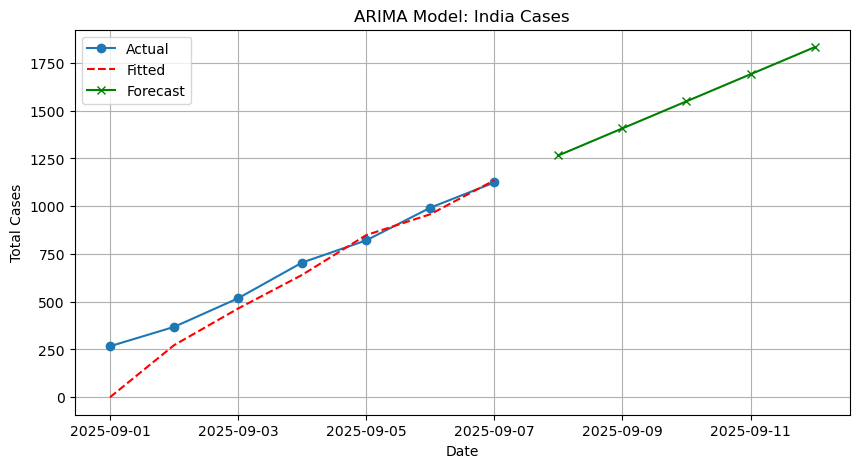

In [415]:
#What this code does

#Extracts India’s total cases as a time-series.

#Plots the actual cases for visualization.

#Fits a simple ARIMA(1,1,1) model to the series.

#Forecasts the next 5 days of cases.

#Plots actual data, fitted values, and forecast on the same chart.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# -------------------------
# Step 1: Prepare India time-series
# -------------------------
india_cases = ts_df[ts_df['country'] == 'India'].set_index('date')['total_cases']

# -------------------------
# Step 2: Visualize the data
# -------------------------
plt.figure(figsize=(10,5))
plt.plot(india_cases, marker='o')
plt.title('India Total Cases Over Time')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# -------------------------
# Step 3: Fit ARIMA model
# -------------------------
# ARIMA(p,d,q): simple example
model = ARIMA(india_cases, order=(1,1,1))
arima_result = model.fit()

# -------------------------
# Step 4: Forecast future cases
# -------------------------
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)
print(f"Forecast for next {forecast_steps} days:")
print(forecast)

# -------------------------
# Step 5: Plot actual vs fitted vs forecast
# -------------------------
plt.figure(figsize=(10,5))
plt.plot(india_cases, label='Actual', marker='o')
plt.plot(arima_result.fittedvalues, label='Fitted', color='red', linestyle='--')
plt.plot(pd.date_range(india_cases.index[-1] + pd.Timedelta(days=1),
                       periods=forecast_steps), forecast,
         label='Forecast', color='green', marker='x')
plt.title('ARIMA Model: India Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()
